In [ ]:
import pandas as pd
import numpy as np

#Obtaining the Data from Google Drive

Using google.colab, I first extract the dataset from my google drive storage and convert into DataFrame using pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TasD/Reviews.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Preprocessing the Dataset

In [ ]:
finaldf = df.sample(5000)
finaldf = finaldf.dropna()

#dropping duplicates (if any)
finaldf = finaldf.drop_duplicates()

#dropping unnecessary columns
finaldf = finaldf.drop(columns=['Id','UserId','ProfileName','Time'])

#combining summary and text
finaldf['Text'] = finaldf['Summary'] + ' ' + finaldf['Text']
finaldf

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
308030,B001BS4G6O,0,0,5,makes pill time a treat,makes pill time a treat I have to give my do m...
205694,B000E65OII,0,0,5,Absolutely Delicious,"Absolutely Delicious <a href=""http://www.amazo..."
557700,B001KUUNFQ,0,0,5,My 2 cats love it!,My 2 cats love it! I have 2 picky eaters-- one...
490172,B000H7GS5W,1,1,4,Tasty,Tasty These are quite good tasting! Even thou...
53302,B00370ESNU,0,0,5,Big fan & great for my diabetic mom,Big fan & great for my diabetic mom I original...
...,...,...,...,...,...,...
525126,B001FZ0SVA,2,2,5,"Booda Bone Dog Treats, 9 Pack","Booda Bone Dog Treats, 9 Pack My dog loves Boo..."
112374,B001GQ3E2I,3,3,5,Crunch Time Peanut Butter,Crunch Time Peanut Butter I always thought Jif...
547453,B006HYLW32,0,0,5,Perfect 100 cal Packs!,Perfect 100 cal Packs! I LOVE salt and vinegar...
392706,B0037B8YQG,0,0,5,Green Mountain Breafast decaf,Green Mountain Breafast decaf Outstanding flav...


In [ ]:
finaldf = finaldf.drop(columns=['Summary'])
finaldf = finaldf.reset_index(drop = True)
finaldf.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
0,B001BS4G6O,0,0,5,makes pill time a treat I have to give my do m...
1,B000E65OII,0,0,5,"Absolutely Delicious <a href=""http://www.amazo..."
2,B001KUUNFQ,0,0,5,My 2 cats love it! I have 2 picky eaters-- one...
3,B000H7GS5W,1,1,4,Tasty These are quite good tasting! Even thou...
4,B00370ESNU,0,0,5,Big fan & great for my diabetic mom I original...


In [ ]:
#check if any particular column have null values
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductId               4999 non-null   object
 1   HelpfulnessNumerator    4999 non-null   int64 
 2   HelpfulnessDenominator  4999 non-null   int64 
 3   Score                   4999 non-null   int64 
 4   Text                    4999 non-null   object
dtypes: int64(3), object(2)
memory usage: 195.4+ KB


In [ ]:
x = finaldf.drop(columns = ["Score"])
x = x.to_numpy()
y = finaldf["Score"].to_numpy()

In the below cell, I split the data into training, validation and test splits (60%, 20% and 20% respectively)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [ ]:
cols = ['Labels','Training Set', 'Validation Set', 'Test Set']
fields = [['Input Fields', len(x_train), len(x_valid),len(x_test)], ['Output Fields', len(y_train), len(y_valid),len(y_test)]]
splitdf = pd.DataFrame(fields, columns= cols)
splitdf.set_index('Labels', inplace=True)
splitdf

,Training Set,Validation Set,Test Set
Labels,,,
Input Fields,2999,1000,1000
Output Fields,2999,1000,1000


In [ ]:
# Target Label 0: Positive sentiment reviews, Target Label 1: Negative sentiment reviews, Target Label 2: Neutral sentiment reviews
mapped_train = []
for labeltrain in y_train:
  labeltrain-= 1
  mapped_train.append(labeltrain)

In [ ]:
#mapping as 0:positive review, 1: negative review, 2: neutral
mapped_labels_train = [1 if label in [1, 2] else 2 if label == 3 else 0 for label in y_train]
mapped_labels_val = [1 if label in [1, 2] else 2 if label == 3 else 0 for label in y_valid]
mapped_labels_test = [1 if label in [1, 2] else 2 if label == 3 else 0 for label in y_test]

Extracting the texts columns from x_train and x_valid

In [ ]:
train_text = x_train[:,3]
#train_text

In [ ]:
val_text = x_valid[:,3]
#val_text

# Tokenizing and then clustering the data

In this section, I tokenize the data first with the help of spacy and then parse the data to remove any html tags, after that I apply the pipeline on a TfidfVectorizer.

In [ ]:
import spacy
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.metrics.pairwise import cosine_similarity
import random

In [ ]:
nlp = spacy.load("en_core_web_sm")

def tokens_re(x):
    tokens = []
    doc = nlp(x)
    for t in doc:
        if not t.is_stop and not t.is_space and not t.is_punct:
            if t.is_alpha:
                tokens.append(t.lemma_.lower())
    return tokens

In [ ]:
from lxml import html

def text_pipe(x):
    # Parse the HTML using lxml parser
    html_ = html.fromstring(x)
    # Get the text content from the HTML
    x = str(html_.text_content())
    # Tokenize the text using a spaCy pipeline
    tokens = tokens_re(x)
    return tokens

In [ ]:
tf_idf = TfidfVectorizer(tokenizer = text_pipe)
X = tf_idf.fit_transform(train_text)
V = tf_idf.transform(val_text)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


After vectorizing the tokens, I write my own implementation of KMeans in the following section.

In [ ]:
import random
from scipy.spatial.distance import cdist

n_samples, n_features = X.shape

def initialCentroids(k):
    return X[np.random.choice(n_samples, k, replace=False), :].toarray()

In [ ]:
def assign(c):
    # Compute distances between each sample and the centroids
    distances = cdist(X.toarray(), c)

    # Assign each sample to the closest centroid
    labels = np.argmin(distances, axis=1)
    return labels

In [ ]:
def recalculate_centroids(labels, k):
    x = []
    for j in range(k):
        C = X[labels == j].toarray()
        if C.shape[0] == 0:
            x.append(initialCentroids(1)[0])
        else:
            x.append(C.mean(axis=0))
    return np.vstack(x)

In [ ]:
def kmeans(k=5, max_iterations=100):
    centroids = initialCentroids(k)
    for i in range(max_iterations):
        labels = assign(centroids)
        updated = recalculate_centroids(labels, k)
        if np.allclose(centroids, updated):
            break
        centroids = updated
    return labels, centroids

In [ ]:
clusters, centroids = kmeans(5)

In [ ]:
#documents assigned to each cluster examples
for i in range(5):
    documents = train_text[np.where(clusters == i)]
    print("Documents for cluster", i+1, ":")
    print(documents[:3])
    print("\n")

Documents for cluster 1 :
['Healthy as a box of chocolates for your dog. You would think such a large brand should be trusted; that they made money by making a healthy product for dogs. Well, let me not even say what effects this dog food had on my dog--let me just show the beginning of the ingredients list from the [...] website as of the date of this review (Check there yourself if you don\'t trust me):<br /><br />Ground yellow corn, chicken by-product meal, corn gluten meal, whole wheat flour, animal fat preserved with mixed-tocopherols (form of Vitamin E), rice flour, beef, soy flour, sugar, sorbitol<br /><br />Corn and corn gluten and rice flour are not exactly wonderful, but--SUGAR and SORBITOL! Sorbitol, that nasty stuff in gum that gives people gas and loose stools! Can you wonder why your dog stinks up the house if it\'s eating this crap? And sugar! Need I even say why that is bad, or what health problems that can lead to? My vet sure got on a soapbox over the dangers of sugar

In [ ]:
cluster_indices = {}
for i, c in enumerate(clusters):
    if c in cluster_indices:
        cluster_indices[c].append(i)
    else:
        cluster_indices[c] = [i]

# Get the top 5 tokens in each centroid
top_tokens = []
for centroid in centroids:
    top_indices = centroid.argsort()[::-1][:5]
    top_tokens.append([tf_idf.get_feature_names_out()[i] for i in top_indices])
top_tokens

[['dog', 'cat', 'food', 'treat', 'love'],
 ['cookie', 'bar', 'gluten', 'free', 'good'],
 ['chip', 'sauce', 'salt', 'flavor', 'good'],
 ['tea', 'coffee', 'cup', 'good', 'taste'],
 ['good', 'great', 'product', 'taste', 'like']]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

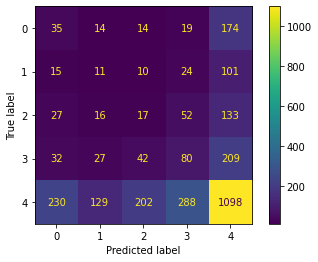

In [ ]:
# Get target labels for each cluster
cluster_labels = [np.bincount(clusters[clusters == i]).argmax() for i in range(5)]

# Assign target labels to each document in each cluster
assigned = [cluster_labels[c] for c in clusters]

# Construct confusion matrix for 5 clusters
conf_matrix = confusion_matrix(mapped_train, assigned, labels=cluster_labels)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
vectorizer = CountVectorizer(tokenizer=text_pipe, binary = True)
X_countvec = vectorizer.fit_transform(train_text)
V_countvec = vectorizer.transform(val_text)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# 1) Dummy Classifier with strategy="most_frequent"
dummy_mf = DummyClassifier(strategy="most_frequent")
dummy_mf.fit(X_countvec, mapped_labels_train)
y_pred_dummy_mf = dummy_mf.predict(V_countvec)

# 2) Dummy Classifier with strategy="stratified"
dummy_str = DummyClassifier(strategy="stratified")
dummy_str.fit(X_countvec, mapped_labels_train)
y_pred_dummy_str = dummy_str.predict(V_countvec)

# 3) LogisticRegression with One-hot vectorization
lr_cvec = LogisticRegression(max_iter=5000)
lr_cvec.fit(X_countvec, mapped_labels_train)
y_pred_lr_cvec = lr_cvec.predict(V_countvec)

# 4) LogisticRegression with TF-IDF vectorization (default settings)
lr_tfidf = LogisticRegression(max_iter=5000)
lr_tfidf.fit(X, mapped_labels_train)
y_pred_lr_tfidf = lr_tfidf.predict(V)

# 5) SVC Classifier with One-hot vectorization (SVM with RBF kernel, default settings)
svc_cvec = SVC()
svc_cvec.fit(X_countvec, mapped_labels_train)
y_pred_svc_cvec = svc_cvec.predict(V_countvec)

In [ ]:
# own classifier/tokenisation/normalisation approach from Scikit Learn
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier
dt_tfidf = DecisionTreeClassifier()

# Fit the model on the training data
dt_tfidf.fit(X, mapped_labels_train)

# Predict on the training and validation sets
y_pred_dt_tfidf_train = dt_tfidf.predict(X)
y_pred_dt_tfidf_val = dt_tfidf.predict(V)

In [ ]:
def evaluation_models(ytrue, ypredict):
    accuracy = accuracy_score(ytrue, ypredict)
    precision = precision_score(ytrue, ypredict, average='macro', zero_division = 1.0)
    recall = recall_score(ytrue, ypredict, average='macro', zero_division = 1.0)
    f1 = f1_score(ytrue, ypredict, average='macro', zero_division = 1.0)
    return accuracy, precision, recall, f1

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
models = {
    "Dummy Most Frequent": dummy_mf,
    "Dummy Stratified": dummy_str,
    "LR with One-hot vectorization": lr_cvec,
    "LR with TF-IDF vectorization": lr_tfidf,
    "SVC Classifier": svc_cvec,
    "DecisionTree TF-IDF": dt_tfidf,
}

train_scores = []
for n,m in models.items():
    if n == "LR with One-hot vectorization" or n == "SVC Classifier":
        X_tr = X_countvec
    elif n == "LR with TF-IDF vectorization" or n=="DecisionTree TF-IDF":
        X_tr = X
    else: #Dummy Most Frequent, Dummy Stratified
        X_tr = X_countvec
    y_pred_train = m.predict(X_tr)
    Tscores = evaluation_models(mapped_labels_train, y_pred_train)
    train_scores.append([n] + list(Tscores))

# Evaluate models on validation set
val_scores = []
for n,m in models.items():
    if n == "Dummy Most Frequent":
        Vscores = evaluation_models(mapped_labels_val, y_pred_dummy_mf)

    elif n == "Dummy Stratified":
        Vscores = evaluation_models(mapped_labels_val, y_pred_dummy_str)

    elif n == "LR with One-hot vectorization":
        Vscores = evaluation_models(mapped_labels_val, y_pred_lr_cvec)

    elif n=="LR with TF-IDF vectorization":
        Vscores = evaluation_models(mapped_labels_val, y_pred_lr_tfidf)

    elif n=="SVC Classifier":
        Vscores = evaluation_models(mapped_labels_val, y_pred_svc_cvec)

    else: #Decision Tree
        Vscores = evaluation_models(mapped_labels_val, y_pred_dt_tfidf_val)

    val_scores.append([n] + list(Vscores))

In [ ]:
colss = ["Classifier", "Accuracy", "Precision", "Recall", "F1"]
print("Training Set Performance")
traindf = pd.DataFrame(train_scores, columns = colss)
traindf.set_index("Classifier", inplace=True)
traindf = traindf.round(3)
print(traindf)

print("\nValidation Set Performance")

valdf = pd.DataFrame(val_scores, columns= colss)
valdf.set_index("Classifier", inplace=True)
valdf = valdf.round(3)
print(valdf)

Training Set Performance
                               Accuracy  Precision  Recall     F1
Classifier                                                       
Dummy Most Frequent               0.779      0.926   0.333  0.292
Dummy Stratified                  0.639      0.350   0.351  0.350
LR with One-hot vectorization     0.996      0.998   0.987  0.993
LR with TF-IDF vectorization      0.865      0.922   0.556  0.608
SVC Classifier                    0.921      0.962   0.729  0.800
DecisionTree TF-IDF               1.000      1.000   1.000  1.000

Validation Set Performance
                               Accuracy  Precision  Recall     F1
Classifier                                                       
Dummy Most Frequent               0.791      0.930   0.333  0.294
Dummy Stratified                  0.625      0.329   0.329  0.329
LR with One-hot vectorization     0.831      0.620   0.547  0.575
LR with TF-IDF vectorization      0.825      0.734   0.428  0.452
SVC Classifier         

In [ ]:
#print(classification_report(mapped_labels_val, y_pred_val))

In [ ]:
#print(classification_report(mapped_labels_train, y_pred_train))

In [ ]:
# Find the classifier with the highest F1 score on the validation set
best_classifier = valdf["F1"].idxmax()
best_classifier

'LR with One-hot vectorization'

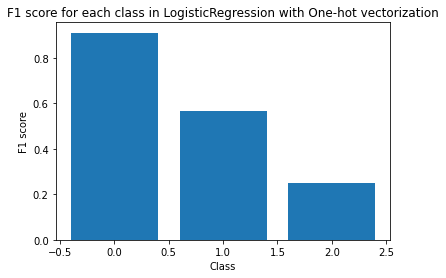

In [ ]:
# Train a logistic regression classifier with one-hot vectorization
import matplotlib.pyplot as plt

report = classification_report(mapped_labels_val, y_pred_lr_cvec, output_dict=True)

# Extract the F1 scores for each class
labels = sorted(set(mapped_labels_val))
f1_score_ = [report[str(label)]['f1-score'] for label in labels]

# Plot the F1 scores
plt.bar(labels, f1_score_)
plt.xlabel('Class')
plt.ylabel('F1 score')
plt.title('F1 score for each class in LogisticRegression with One-hot vectorization')
plt.show()

# Parameter Tuning

In this section, I try out different parameters on classifier and vectorizer to find the optimal parameters for the same.
1. Classifier - Regularisation C value (typical values might be powers of 10 (from 10^-3 to 10^5)
2. Vectorizer - Parameters: sublinear_tf (either True or False), max_features (vocabulary size) (in a range None to 50k), and norm (either l1 or l2)

In [ ]:
from sklearn.model_selection import ParameterGrid

In [ ]:
cdict = {
    'C': [0.1, 0.001, 10, 100, 1000, 10000],   #from 10^-3 to 10^5
}
best_c, cscore = None, 0
for param in ParameterGrid(cdict):
    cLR = LogisticRegression(random_state=42, C=param['C'],max_iter=1000)
    cLR.fit(X, mapped_labels_train)


    ypred = cLR.predict(V)
    valscore = evaluation_models(mapped_labels_val, ypred)
    print(f"Evaluating {param} -")
    print("Accuracy", valscore[0])
    print("Precision", valscore[1])
    print("Recall", valscore[2])
    print("F1", valscore[3])
    print("\n")

    if valscore[3] > cscore:
        best_c = param
        cscore = valscore[3]

print(f"Best params: {best_c}")
print(f"Best score: {cscore:.3f}")

Evaluating {'C': 0.01} -
Accuracy 0.791
Precision 0.9303333333333333
Recall 0.3333333333333333
F1 0.2944351386562442


Evaluating {'C': 0.1} -
Accuracy 0.791
Precision 0.9303333333333333
Recall 0.3333333333333333
F1 0.2944351386562442


Evaluating {'C': 1} -
Accuracy 0.825
Precision 0.7340441833737709
Recall 0.4275024481047273
F1 0.4518477240126724


Evaluating {'C': 10} -
Accuracy 0.844
Precision 0.6607413892267991
Recall 0.5267824173025676
F1 0.5652777777777779


Evaluating {'C': 1000} -
Accuracy 0.829
Precision 0.6169426553572895
Recall 0.5354594706030372
F1 0.5646014337938564


Evaluating {'C': 100000} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002


Best params: {'C': 100000}
Best score: 0.572


In [ ]:
mf_cdict = {
    'C': [best_c['C']],   # 10 because it had the best f1 score
    'max_features': [None, 5000, 10000, 20000, 50000], #from None to 50K
}
best_mf, mfscore = None, 0
for param in ParameterGrid(mf_cdict):
    vectorizer2 = TfidfVectorizer(tokenizer=text_pipe, max_features=param['max_features']) #max_features is a vectorizer parameter unlike C
    x_mf = vectorizer2.fit_transform(train_text)
    v_mf = vectorizer2.transform(val_text)
    cLR2 = LogisticRegression(random_state=36, C=param['C'],max_iter=1000)
    cLR2.fit(x_mf, mapped_labels_train)


    ypred2 = cLR2.predict(v_mf)
    valscore2 = evaluation_models(mapped_labels_val, ypred2)
    print(f"Evaluating {param} -")
    print("Accuracy", valscore2[0])
    print("Precision", valscore2[1])
    print("Recall", valscore2[2])
    print("F1", valscore2[3])
    print("\n")

    if valscore2[3] > mfscore:
        best_mf = param
        mfscore = valscore2[3]


print(f"Best params: {best_mf}")
print(f"Best score: {mfscore:.3f}")

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': None} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': 5000} -
Accuracy 0.816
Precision 0.5777062900821163
Recall 0.5292068747025136
F1 0.5485896430752931




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': 15000} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': 25000} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': 50000} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002


Best params: {'C': 100000, 'max_features': None}
Best score: 0.572


In [ ]:
params_3 = {
    'C': [best_mf['C']],
    'sublinear_tf': [True, False], #Either true or False
    'max_features': [best_mf['max_features']],
}

best_stf, stfscore = None, 0
for param in ParameterGrid(params_3):
    vectorizer3 = TfidfVectorizer(tokenizer=text_pipe, max_features=param['max_features'], sublinear_tf=param['sublinear_tf'])
    x_stf = vectorizer3.fit_transform(train_text)
    v_stf = vectorizer3.transform(val_text)
    cLR3 = LogisticRegression(random_state=36, C=param['C'],max_iter=1000)
    cLR3.fit(x_stf, mapped_labels_train)


    ypred3 = cLR3.predict(v_stf)
    valscore3 = evaluation_models(mapped_labels_val, ypred3)
    print(f"Evaluating {param} -")
    print("Accuracy", valscore3[0])
    print("Precision", valscore3[1])
    print("Recall", valscore3[2])
    print("F1", valscore3[3])
    print("\n")

    if valscore3[3] > stfscore:
        best_stf = param
        stfscore = valscore3[3]


print(f"Best params: {best_stf}")
print(f"Best score: {stfscore:.3f}")

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': None, 'sublinear_tf': True} -
Accuracy 0.823
Precision 0.6018790849673203
Recall 0.5368843736641534
F1 0.5619467144757159




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': None, 'sublinear_tf': False} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002


Best params: {'C': 100000, 'max_features': None, 'sublinear_tf': False}
Best score: 0.572


In [ ]:
finalparam = {
    'C': [best_stf['C']],   # 10 because it had the best f1 score
    'sublinear_tf': [best_stf['sublinear_tf']], #Either true or False
    'max_features': [best_stf['max_features']],
    'norm': ['l1','l2']
}
best_norm, normscore = None, 0
for param in ParameterGrid(finalparam):
    vectorizer4 = TfidfVectorizer(tokenizer=text_pipe, max_features=param['max_features'], norm = param['norm'], sublinear_tf=param['sublinear_tf'])
    x_norm = vectorizer4.fit_transform(train_text)
    v_norm = vectorizer4.transform(val_text)
    cLR4 = LogisticRegression(random_state=36, C=param['C'],max_iter=5000)
    cLR4.fit(x_norm, mapped_labels_train)


    ypred4 = cLR4.predict(v_norm)
    valscore4 = evaluation_models(mapped_labels_val, ypred4)
    print(f"Evaluating {param} -")
    print("Accuracy", valscore4[0])
    print("Precision", valscore4[1])
    print("Recall", valscore4[2])
    print("F1", valscore4[3])
    print("\n")

    if valscore4[3] > normscore:
        best_norm = param
        normscore = valscore4[3]


print(f"Best params: {best_norm}")
print(f"Best score: {normscore:.3f}")

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': None, 'norm': 'l1', 'sublinear_tf': False} -
Accuracy 0.828
Precision 0.6196181945610735
Recall 0.5543767261791073
F1 0.5802308716951038




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Evaluating {'C': 100000, 'max_features': None, 'norm': 'l2', 'sublinear_tf': False} -
Accuracy 0.827
Precision 0.6152548859465113
Recall 0.5452743241563512
F1 0.5721425834485002


Best params: {'C': 100000, 'max_features': None, 'norm': 'l1', 'sublinear_tf': False}
Best score: 0.580


In [ ]:
# BEST PARAMETERS
bestparam = {
    'C': best_norm['C'],
    'sublinear_tf': best_norm['sublinear_tf'],
    'max_features': best_norm['max_features'],
    'norm': best_norm['norm']
}

vectorizer5 = TfidfVectorizer(tokenizer=text_pipe, max_features=bestparam['max_features'], norm = bestparam['norm'], sublinear_tf=bestparam['sublinear_tf'])
x_5 = vectorizer5.fit_transform(train_text)
v_5 = vectorizer5.transform(val_text)
cLR5 = LogisticRegression(random_state=36, C=bestparam['C'],max_iter=5000)
cLR5.fit(x_5, mapped_labels_train)

ypred5 = cLR5.predict(v_5)
valscore5 = evaluation_models(mapped_labels_val, ypred5)
print("Following are the results when I applied the best obtained parameters on pipeline:")
print(f"Evaluating {param} -")
print("Accuracy", valscore5[0])
print("Precision", valscore5[1])
print("Recall", valscore5[2])
print("F1", valscore5[3])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Following are the results when I applied the best obtained parameters on pipeline:
Evaluating {'C': 100000, 'max_features': None, 'norm': 'l2', 'sublinear_tf': False} -
Accuracy 0.828
Precision 0.6196181945610735
Recall 0.5543767261791073
F1 0.5802308716951038


In [ ]:
cols2 = ['Parameters', 'Accuracy', 'Precision', 'Recall', 'F1']
best_p = '\'C\': 1000, \'max_features\': 5000, \'norm\': \'l2\', \'sublinear_tf\': False'
valscore_values = list(valscore5)
paramdf = pd.DataFrame(columns=cols2)
paramdf.loc[0] = [best_p] + [round(v, 3) for v in valscore_values]
paramdf

,Parameters,Accuracy,Precision,Recall,F1
0,"'C': 1000, 'max_features': 5000, 'norm': 'l2',...",0.828,0.62,0.554,0.58


# Context vectors using BERT

In this section, I will:

(a) Encode the text using the ‘feature-extraction’ pipeline from the HuggingFace library with the
‘roberta_base’ model.
Pass the context vectors (without any other previous features) into a LogisticRegression classifier from scikit-learn
and train using the training set.

(b) Train an end-to-end classifier using the ‘trainer’ function from the HuggingFace library, again using the
‘roberta_base’ model. Using a learning rate = 1e-4, epochs = 1, batch_size = 16 and no weight decay.

(c) Try different values for the model, learning_rate, epochs and batch_size.

In [ ]:
import locale
def getutf(do_setlocale = True):
  return('UTF-8')
locale.getpreferredencoding = getutf

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 28.0 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from transformers import RobertaTokenizer, TFRobertaModel
from sklearn.linear_model import LogisticRegression

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
train_features = pipeline(task='feature-extraction', model='roberta-base', max_length=1024, truncation=True, padding=True)(train_text.tolist())
val_features = pipeline(task='feature-extraction', model='roberta-base', max_length=1024, truncation=True, padding=True)(val_text.tolist())

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_feat = np.array([features[0][0] for features in train_features])
val_feat = np.array([features[0][0] for features in val_features])

In [ ]:
lr = LogisticRegression(max_iter = 2500)
lr.fit(train_feat, mapped_labels_train)

LogisticRegression(max_iter=2500)

In [ ]:
val_preds = lr.predict(val_feat)
print(classification_report(mapped_labels_val, val_preds))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       791
           1       0.79      0.63      0.70       139
           2       0.58      0.16      0.25        70

    accuracy                           0.88      1000
   macro avg       0.76      0.59      0.63      1000
weighted avg       0.86      0.88      0.86      1000



In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 37.2 MB/s eta 0:00:00


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset

In [ ]:
import torch.nn as nn

In [ ]:
# Load the pre-trained RoBERTa model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=5)

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=1e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0,
)

train_encodings = roberta_tokenizer(train_text.tolist(), truncation=True, padding=True)
train_encodings['labels'] = mapped_labels_train
val_encodings = roberta_tokenizer(val_text.tolist(), truncation=True, padding=True)
val_encodings['labels'] = mapped_labels_val
train_dataset = Dataset.from_dict(train_encodings)
valid_dataset = Dataset.from_dict(val_encodings)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [ ]:
# Train the model
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.646508,0.791000,0.263667,0.333333,0.294435


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=188, training_loss=0.7017381546345163, metrics={'train_runtime': 82.2711, 'train_samples_per_second': 36.453, 'train_steps_per_second': 2.285, 'total_flos': 789091309249536.0, 'train_loss': 0.7017381546345163, 'epoch': 1.0})

In [ ]:
val_preds = trainer.evaluate(valid_dataset)
val_preds

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'eval_loss': 0.6465083956718445,
 'eval_accuracy': 0.791,
 'eval_precision': 0.26366666666666666,
 'eval_recall': 0.3333333333333333,
 'eval_f1': 0.2944351386562442,
 'eval_runtime': 7.6714,
 'eval_samples_per_second': 130.355,
 'eval_steps_per_second': 8.212,
 'epoch': 1.0}

In [ ]:
training_args1 = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0,
)

trainer1 = Trainer(
    model=model,
    args=training_args1,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
)

In [ ]:
trainer1.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.652466,0.791000,0.263667,0.333333,0.294435
2,No log,0.646546,0.791000,0.263667,0.333333,0.294435


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=376, training_loss=0.6926398581646859, metrics={'train_runtime': 157.1732, 'train_samples_per_second': 38.162, 'train_steps_per_second': 2.392, 'total_flos': 1578182618499072.0, 'train_loss': 0.6926398581646859, 'epoch': 2.0})

In [ ]:
training_args2 = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-4,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0,
)

trainer2 = Trainer(
    model=model,
    args=training_args2,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
)

In [ ]:
trainer2.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.673935,0.791000,0.263667,0.333333,0.294435
2,No log,0.646352,0.791000,0.263667,0.333333,0.294435


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=188, training_loss=0.6843756817756815, metrics={'train_runtime': 148.3917, 'train_samples_per_second': 40.42, 'train_steps_per_second': 1.267, 'total_flos': 1578182618499072.0, 'train_loss': 0.6843756817756815, 'epoch': 2.0})

In [ ]:
training_args3 = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=4e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=15,
    num_train_epochs=3,
    weight_decay=0,
)

trainer3 = Trainer(
    model=model,
    args=training_args3,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=lambda pred: {
        'accuracy': accuracy_score(pred.label_ids, pred.predictions.argmax(-1)),
        'precision': precision_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'recall': recall_score(pred.label_ids, pred.predictions.argmax(-1), average='macro'),
        'f1': f1_score(pred.label_ids, pred.predictions.argmax(-1), average='macro')
      },
)

In [ ]:
trainer3.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.652298,0.791000,0.263667,0.333333,0.294435
2,No log,0.645908,0.791000,0.263667,0.333333,0.294435
3,No log,0.646526,0.791000,0.263667,0.333333,0.294435


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=282, training_loss=0.6721632396075743, metrics={'train_runtime': 221.91, 'train_samples_per_second': 40.543, 'train_steps_per_second': 1.271, 'total_flos': 2367273927748608.0, 'train_loss': 0.6721632396075743, 'epoch': 3.0})

# Best Model on Test Data

In [ ]:
X_test = roberta_tokenizer(x_test[:,3].tolist(),truncation=True,padding=True)
X_test["labels"] = mapped_labels_test
test_dataset = Dataset.from_dict(X_test)

In [ ]:
p, label_ids, m = trainer1.predict(test_dataset)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


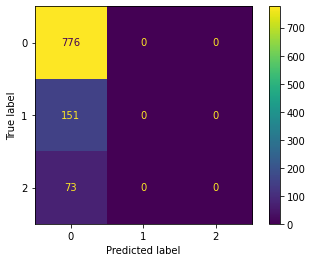

In [ ]:
predicted_labels = p.argmax(axis=1)
true_labels = label_ids
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(true_labels, predicted_labels)).plot()